In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/twitter-sentiment.csv.csv', encoding='latin-1', header=None)

In [ ]:
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan i dived many times for the ball. man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
38008,0,1573146542,Mon Apr 20 23:54:37 PDT 2009,NO_QUERY,procedura,still can't follow @warrenellis i click and c...
38009,0,1573146595,Mon Apr 20 23:54:38 PDT 2009,NO_QUERY,Haarlz,going to school in 6 mins double biology less...
38010,0,1573146730,Mon Apr 20 23:54:40 PDT 2009,NO_QUERY,knitwitmum,off to hospital this morning for son to have a...
38011,0,1573146787,Mon Apr 20 23:54:41 PDT 2009,NO_QUERY,rachelbowley,"@wendywings oh yum! that's hilarious, my boyfr..."


In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [ ]:
# Define stopwords and tokenizer
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
tokenizer = TweetTokenizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to remove stopwords, punctuations, usernames, and emojis
def preprocess_text(text):
    # Remove usernames starting with '@'
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove emojis and other non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Tokenize the text
    tokens = tokenizer.tokenize(text)

    # Remove stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]

    # Join the tokens back into a single string
    processed_text = ' '.join(filtered_tokens)

    return processed_text

In [ ]:
# Apply the preprocessing function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

TypeError: ignored

In [ ]:
# Print the modified DataFrame
df.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Preprocess the data
df = df[['target', 'processed_text']]
df['target'] = df['target'].map({0: 'negative', 4: 'positive'})
df = df.sample(frac=1, random_state=42)

<ipython-input-15-6b5f2e9ebd1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map({0: 'negative', 4: 'positive'})


In [ ]:
# Increase the sample size to 80000
df = df[:80000]

In [ ]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the training and testing text data
train_features = vectorizer.fit_transform(train_df['processed_text'])
test_features = vectorizer.transform(test_df['processed_text'])

In [ ]:
# Create a Logistic Regression classifier
logreg = LogisticRegression()

# Train the Logistic Regression classifier
logreg.fit(train_features,train_df['target'])

LogisticRegression()

In [ ]:
# Make predictions on the test set
predictions = logreg.predict(test_features)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(test_df['target'], predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 76.08%


In [ ]:
# Calculate and print classification report
classification_rep = classification_report(test_df['target'], predictions)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.75      0.76      8005
    positive       0.75      0.77      0.76      7995

    accuracy                           0.76     16000
   macro avg       0.76      0.76      0.76     16000
weighted avg       0.76      0.76      0.76     16000



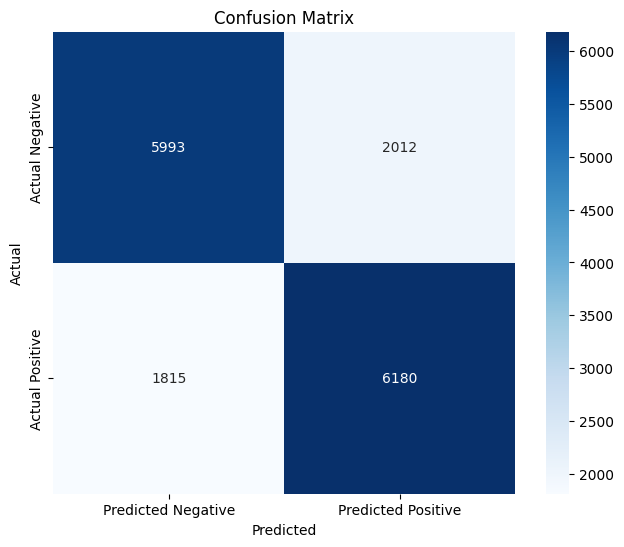

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(test_df['target'], predictions)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()